# Bài tập về nhà Decision Tree, Random Forest


- Thực hiện các yêu cầu dưới đây với tập dữ liệu Australian credit
- Down dữ liệu tại đường link dưới đây và đặt vào folder /data
 
  https://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)
    

In [3]:
# import packages,...
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

random_state = 0


## 1. Tìm hiểu dữ liệu

In [4]:
'''
- Tìm hiểu cấu trúc data tại trang web UCI
- Down các files, đặt trong folder data/
- Chú ý:
    - Đọc mô tả dữ liệu trong file 'australian.doc'
    - Kiểm tra DecisionTree/RandomForest của Sklearn có hỗ trợ với kiểu dữ liệu được cung cấp không
'''
data_path = './data/australian.dat'

In [5]:
data_df = pd.read_csv(data_path, header=None, delim_whitespace=True)
data_df.head()

/var/folders/bn/wpq8w0rs35g1r9gt5h2tpkcr0000gn/T/ipykernel_36670/408912497.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_df = pd.read_csv(data_path, header=None, delim_whitespace=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
data_df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [7]:
X = data_df.drop(columns=14)
y = data_df[14]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## 2. Decision Tree

### 2.1. Khảo sát các giá trị khác nhau của max_depth

Text(0.5, 1.0, 'DT validation curve for max_depth')

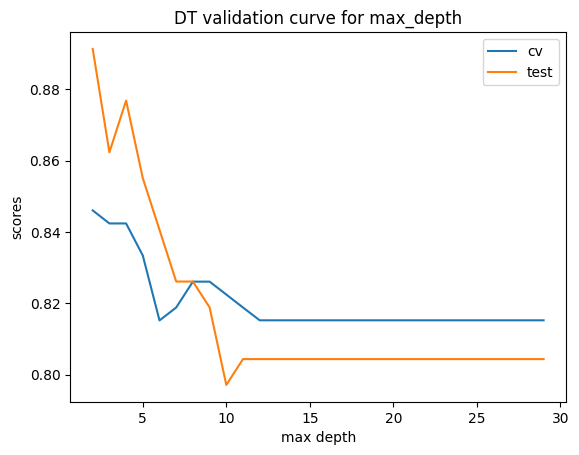

In [9]:
cv_accuracies_by_depth, test_accuracies_by_depth= [], []
max_depth_values= np.arange(2,30)

for curr_max_depth in max_depth_values:
  tree= DecisionTreeClassifier(random_state=random_state, max_depth=curr_max_depth)
  
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='accuracy')
  cv_accuracies_by_depth.append(val_scores.mean())

  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(accuracy_score(curr_pred, y_test))

# Plot 
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')

### 2.2. Tìm kiếm siêu tham số

In [13]:
#code
parameter={
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30],
    'min_samples_split' : np.arange(2,202,20),
    'min_samples_leaf' : np.arange(1,201,20),
    'max_leaf_nodes': (2, 5, 10, 20, 50),
    'class_weight': ['balanced', None]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=random_state),
    param_grid=parameter,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

gridfit = grid.fit(X_train, y_train)
print(gridfit.best_params_)
y_pred = gridfit.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 13000 candidates, totalling 65000 fits
{'class_weight': None, 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}
0.8623188405797102


## 3. Random Forest

### 3.1 Khảo sát các giá trị khác nhau của n_estimators

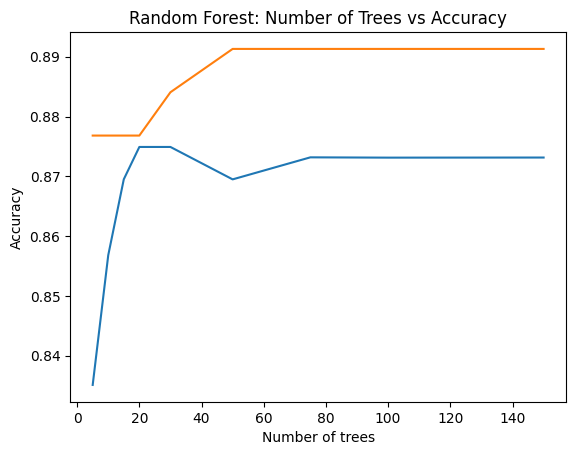

In [24]:
#code
num_trees = [5, 10, 15, 20, 30, 50, 75, 100, 150]
train_acc = []
test_acc = []

for n in num_trees:
    rf= RandomForestClassifier(n_estimators=n, random_state=random_state)
    train_val = cross_val_score( estimator=rf, X = X_train, y = y_train, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
    
    train_acc.append(train_val.mean())

    rf.fit(X_train, y_train)
    y_test_pred = rf.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Plot
plt.plot(num_trees, train_acc, label='train')
plt.plot(num_trees, test_acc, label='test')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Random Forest: Number of Trees vs Accuracy')
plt.show()

### 3.2 Tìm kiếm siêu tham số

In [29]:
# code
parameter={
    'max_depth': [2,3,5,7,10, 20],
    'min_samples_leaf': [1,10,30,60],
    'max_features': [1.0,'log2','sqrt','auto'],
    'n_estimators': [1,2,3,5,10, 20, 50, 100,170]
    }
rf = RandomForestClassifier(random_state=random_state)
grid=GridSearchCV(rf, parameter, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gridfit=grid.fit(X_train,y_train)
print(gridfit.best_params_)
y_pred = gridfit.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 20}
0.8768115942028986


/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
196 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_p